In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import linear_model
from tqdm import tqdm
import matplotlib.pyplot as plt
import alpha_operations as op
import alpha_metrics as mtr
%matplotlib inline

In [2]:
mldata_path = '/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/mldata.csv'

In [3]:
mldata = pd.read_csv(mldata_path,index_col=0)
mldata

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283375,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.99,0.99,0.57,0.59,0.34,0.63,-0.029,-0.027,0.038,0.112
283376,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.29,0.64,0.028,0.077,0.175,0.122
283377,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.27,0.64,0.011,0.076,0.152,0.091
283378,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.99,0.99,0.57,0.60,0.26,0.66,0.045,0.178,0.196,0.040


In [98]:
mldata.columns.size

99

In [99]:
features = mldata[mldata.columns[2:-4]]
targets = mldata[mldata.columns[-4:]]

In [100]:
features

,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,Cash_Per_Share,...,Share_Turn_6M,Ta,Tev_Less_Mktcap,Tot_Debt_Rev,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd
0,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,0.13,0.16,...,0.57,0.05,0.26,0.85,0.02,0.27,1.00,0.92,0.84,0.88
1,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,0.09,0.16,...,0.61,0.05,0.26,0.85,0.02,0.27,1.00,0.92,0.84,0.88
2,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,0.05,0.16,...,0.63,0.05,0.24,0.85,0.02,0.27,1.00,0.92,0.87,0.88
3,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,0.78,0.18,...,1.00,0.42,0.81,0.69,0.40,0.75,1.00,1.00,1.00,0.99
4,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,0.78,0.18,...,1.00,0.42,0.80,0.69,0.40,0.75,1.00,1.00,1.00,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283375,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,0.28,0.19,...,0.64,0.99,0.99,0.83,0.99,0.99,0.57,0.59,0.34,0.63
283376,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,0.19,0.18,...,0.63,0.99,0.99,0.83,0.99,0.99,0.58,0.60,0.29,0.64
283377,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,0.27,0.18,...,0.56,0.99,0.99,0.83,0.99,0.99,0.58,0.60,0.27,0.64
283378,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,0.30,0.22,...,0.54,0.99,0.99,0.83,0.99,0.99,0.57,0.60,0.26,0.66


In [101]:
targets

,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,0.089,0.104,0.344,-0.041
1,0.039,0.091,-0.011,-0.253
2,-0.012,0.101,0.118,-0.366
3,0.174,-0.144,-0.518,-0.376
4,-0.106,-0.576,-0.535,-0.113
...,...,...,...,...
283375,-0.029,-0.027,0.038,0.112
283376,0.028,0.077,0.175,0.122
283377,0.011,0.076,0.152,0.091
283378,0.045,0.178,0.196,0.040


In [102]:
X = features.values
y = targets.R1M_Usd.values

In [103]:
X

array([[0.25, 0.33, 0.27, ..., 0.92, 0.84, 0.88],
       [0.25, 0.32, 0.28, ..., 0.92, 0.84, 0.88],
       [0.26, 0.3 , 0.3 , ..., 0.92, 0.87, 0.88],
       ...,
       [0.97, 0.96, 0.97, ..., 0.6 , 0.27, 0.64],
       [0.97, 0.96, 0.97, ..., 0.6 , 0.26, 0.66],
       [0.41, 0.63, 0.52, ..., 0.18, 0.97, 0.96]])

In [104]:
y

array([ 0.089,  0.039, -0.012, ...,  0.011,  0.045, -0.356])

In [105]:
lr = linear_model.LinearRegression()

In [106]:
lr.fit(X,y)

KeyboardInterrupt: 

In [ ]:
s = pd.Series(lr.coef_,index=features.columns).sort_values()
_s = pd.concat([s.iloc[:10],s.iloc[-10:]])

<BarContainer object of 20 artists>

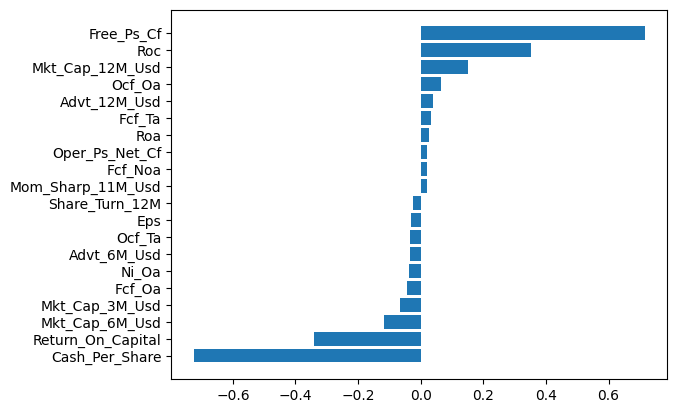

In [14]:
plt.barh(_s.index,_s.values)

### Lasso

In [15]:
lasso_lr = linear_model.Lasso(alpha=1e-3)

In [16]:
alphas = np.logspace(-6, -2, 20)

In [17]:
coef = dict()
for alpha in tqdm(alphas):
    lasso_lr = linear_model.Lasso(alpha=alpha)
    lasso_lr.fit(X, y)
    coef[alpha] = lasso_lr.coef_

  0%|          | 0/20 [00:00<?, ?it/s]/home/chingisbadmaev/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.273e+03, tolerance: 8.966e-01
  model = cd_fast.enet_coordinate_descent(
  5%|▌         | 1/20 [02:40<50:52, 160.67s/it]/home/chingisbadmaev/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.612e+03, tolerance: 8.966e-01
  model = cd_fast.enet_coordinate_descent(
 10%|█         | 2/20 [05:18<47:46, 159.27s/it]/home/chingisbadmaev/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective 

In [18]:
df = pd.DataFrame(list(coef.values()), index=coef.keys(), columns=features.columns)

<AxesSubplot: >

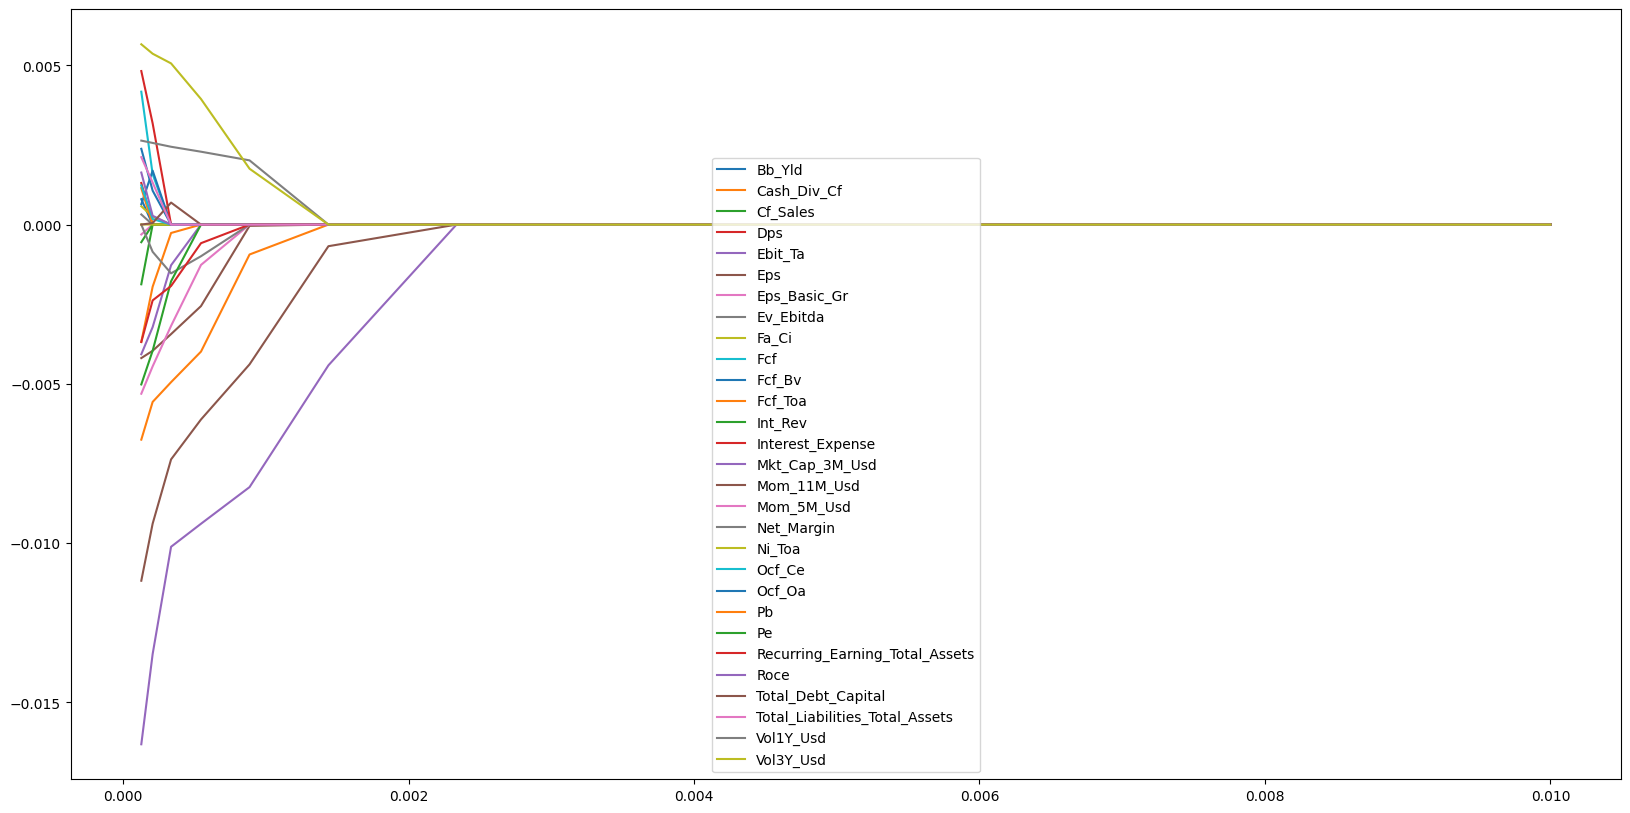

In [19]:
df.iloc[10:].loc[:,df.iloc[10:].abs().sum(axis=0)>0].plot(figsize=(20,10))

In [20]:
s = df.loc[(df != 0).sum(axis=1) == 6].iloc[0]
s[s != 0]

Eps              -0.004388
Mkt_Cap_3M_Usd   -0.008242
Mom_11M_Usd      -0.000039
Pb               -0.000939
Vol1Y_Usd         0.002016
Vol3Y_Usd         0.001754
Name: 0.0008858667904100823, dtype: float64

### Ridge 

In [61]:
# ridge_lr = linear_model.Ridge(alpha=1e-3)
alphas = np.linspace(0.01, 5, 200)
coef = dict()
for alpha in tqdm(alphas):
    ridge_lr = linear_model.Ridge(alpha=alpha)
    ridge_lr.fit(X, y)
    coef[alpha] = ridge_lr.coef_

100%|██████████| 200/200 [03:02<00:00,  1.10it/s]


In [62]:
df = pd.DataFrame(list(coef.values()), index=coef.keys(), columns=features.columns)

<AxesSubplot: >

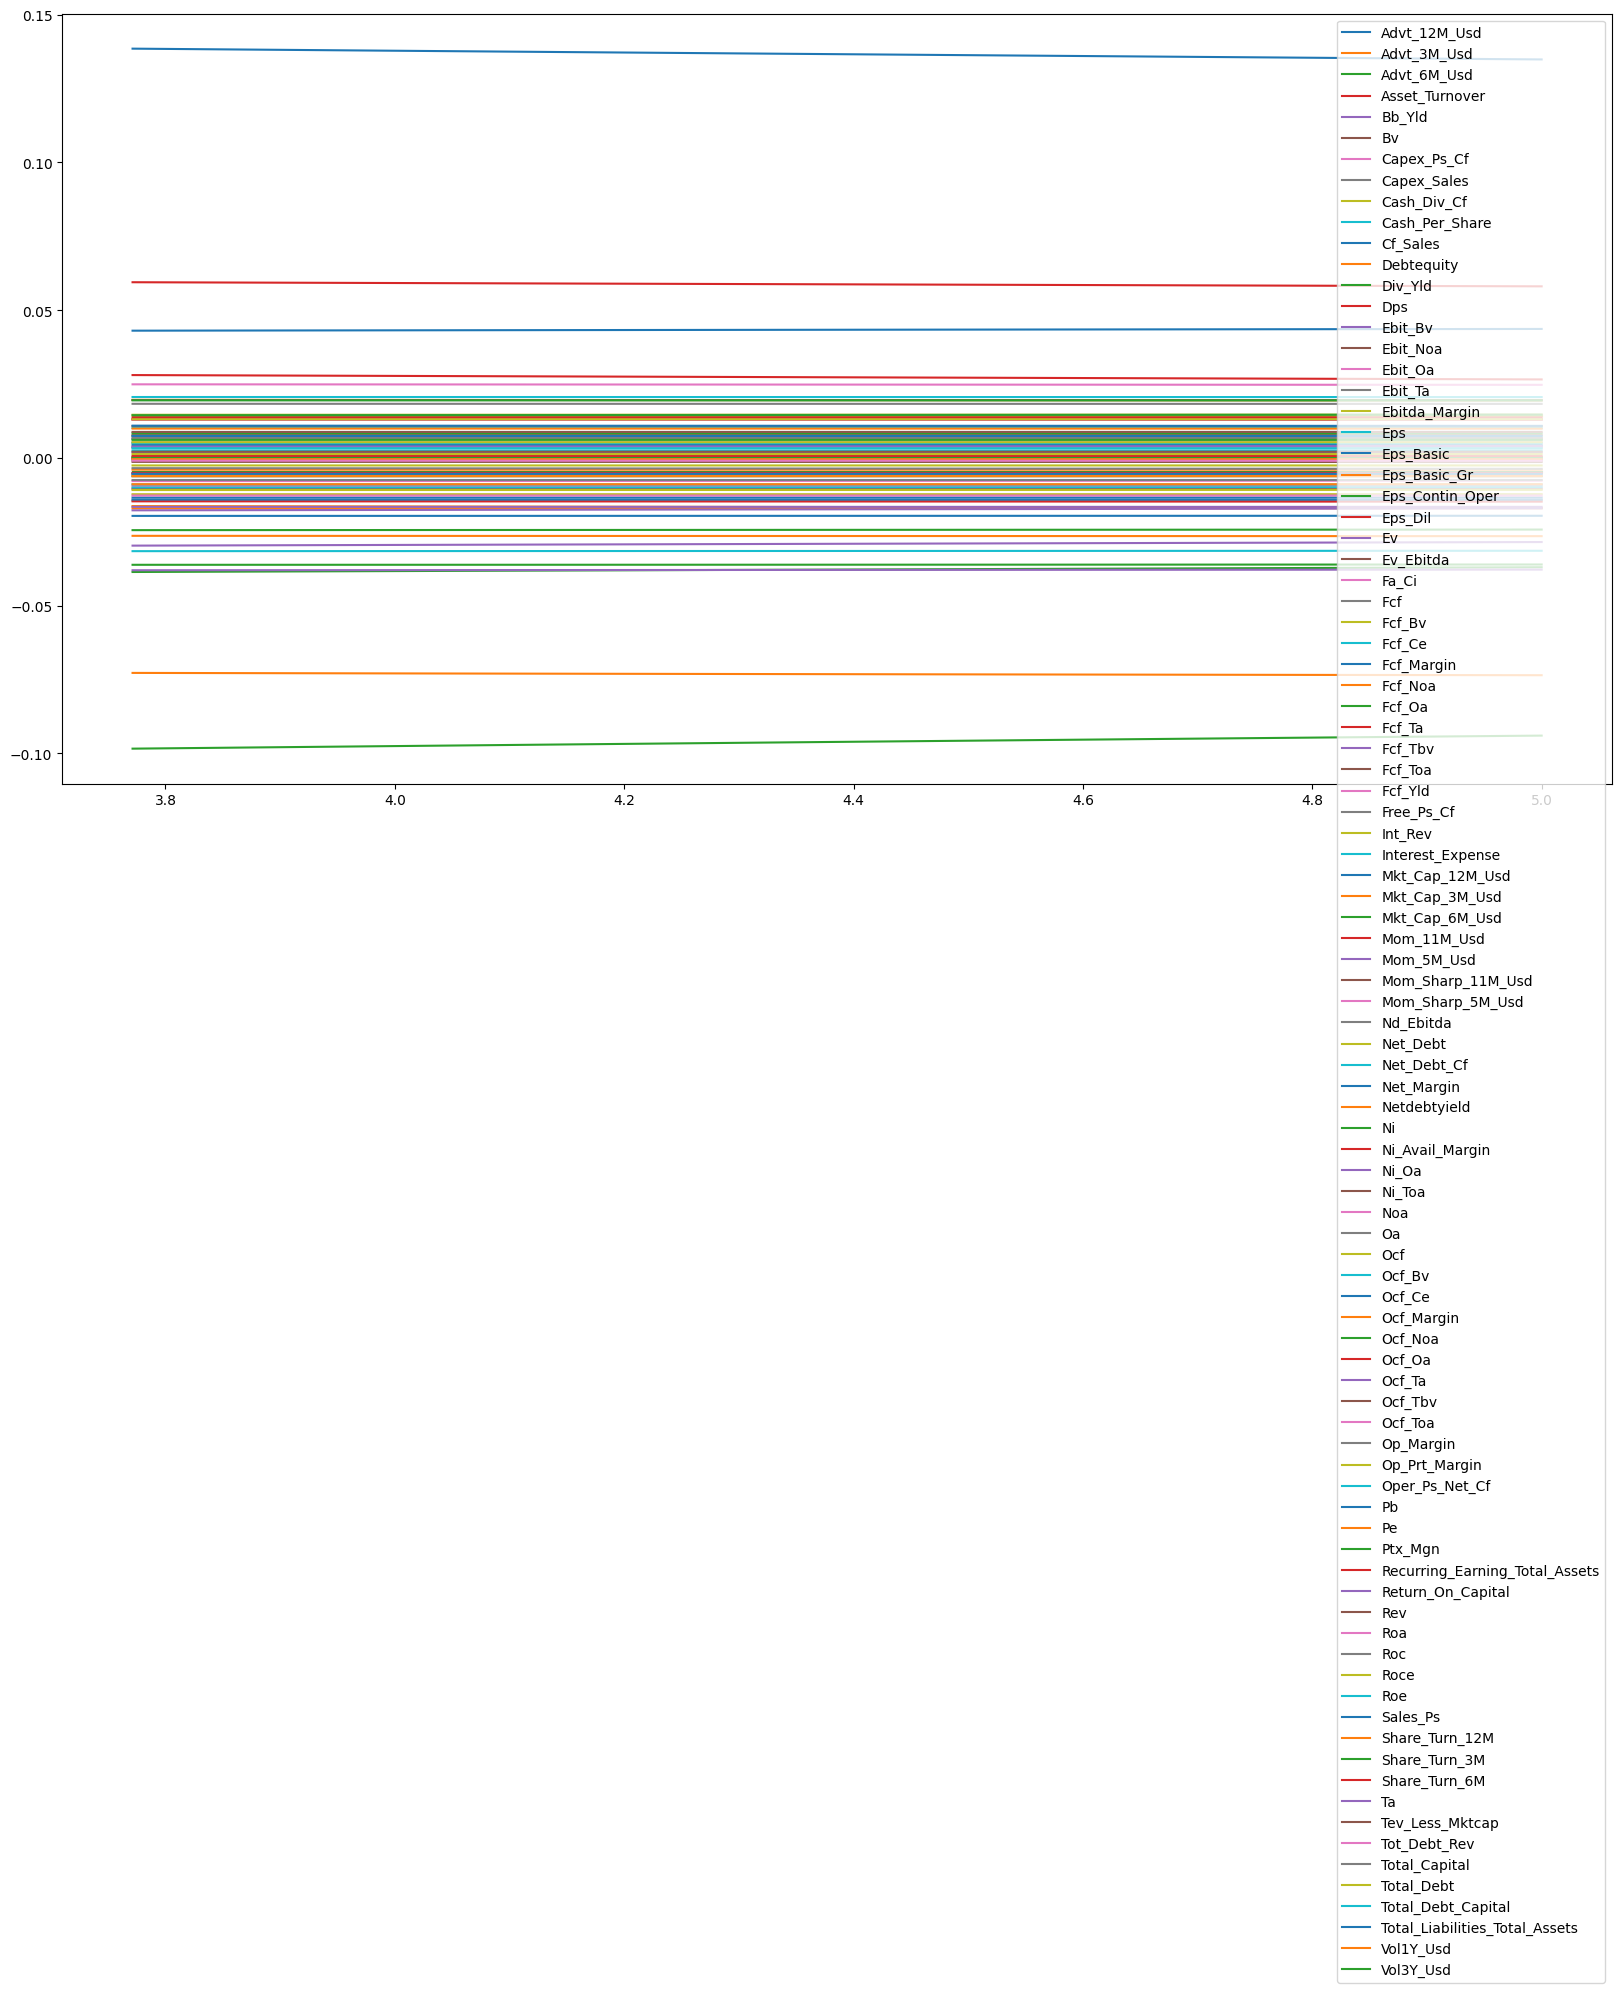

In [63]:
df.iloc[150:].loc[:,df.iloc[150:].abs().sum(axis=0)>0].plot(figsize=(20,10))

In [94]:
s = df.loc[(abs(df) > 0.1).sum(axis=1) == 4].iloc[0]
s[abs(s) > 0.1]

Mkt_Cap_12M_Usd      0.152237
Mkt_Cap_6M_Usd      -0.116988
Return_On_Capital   -0.100333
Roc                  0.110521
Name: 0.03507537688442211, dtype: float64

### Data transformation

In [72]:
features = list(dict(s[s != 0]).keys()) + ['R1M_Usd']
data = mldata.set_index(['date', 'stock_id']).unstack(level=0)[features]
data

Eps                                                         \
date     1998-11-30 1998-12-31 1999-01-31 1999-02-28 1999-03-31 1999-04-30   
stock_id                                                                     
1              0.01       0.01       0.01       0.01       0.01       0.01   
2              0.29       0.30       0.30       0.30       0.31        NaN   
3              0.30       0.31       0.31       0.31       0.36       0.50   
4              0.85       0.85       0.85       0.85       0.65       0.60   
5               NaN        NaN        NaN        NaN        NaN       0.31   
...             ...        ...        ...        ...        ...        ...   
1208           0.91       0.91       0.91       0.91       0.50       0.42   
1209           0.20       0.24       0.24       0.24       0.25        NaN   
1210           0.77       0.77       0.77       0.77       0.80       0.76   
1211            NaN        NaN        NaN        NaN        NaN       0.31   
1212           0.11       0.11       0.11       0.11       0.38       0.25   

                                                      ...    R1M_Usd  \
date     1999-05-31 1999-06-30 1999-07-31 1999-08-31  ... 2018-06-30   
stock_id                                              ...              
1              0.01       0.01       0.01       0.01  ...      0.000   
2               NaN       0.44       0.44       0.44  ...     -0.021   
3              0.50       0.37       0.37       0.37  ...     -0.039   
4              0.60       0.61       0.61       0.61  ...      0.029   
5              0.31       0.37       0.37       0.37  ...     -0.020   
...             ...        ...        ...        ...  ...        ...   
1208           0.42       0.40       0.40       0.40  ...      0.011   
1209            NaN        NaN        NaN        NaN  ...      0.016   
1210           0.76       0.78       0.78       0.78  ...     -0.006   
1211           0.31       0.33       0.33       0.33  ...      0.034   
1212           0.25       0.32       0.32       0.32  ...      0.008   

                                                                            \
date     2018-07-31 2018-08-31 2018-09-30 2018-10-31 2018-11-30 2018-12-31   
stock_id                                                                     
1            -0.077     -0.002     -0.155      0.014     -0.110      0.082   
2            -0.031     -0.009     -0.044     -0.136     -0.079      0.090   
3             0.033     -0.049     -0.070      0.036     -0.070      0.030   
4            -0.004      0.036     -0.025      0.000     -0.088      0.043   
5             0.202      0.015     -0.172      0.147     -0.110        NaN   
...             ...        ...        ...        ...        ...        ...   
1208         -0.054      0.126     -0.119      0.205     -0.189      0.227   
1209          0.142     -0.009      0.000      0.076     -0.147      0.092   
1210          0.021     -0.011      0.028      0.063     -0.064      0.108   
1211          0.039      0.016     -0.023      0.057     -0.070        NaN   
1212          0.048      0.044     -0.266      0.013     -0.125      0.222   

                                           
date     2019-01-31 2019-02-28 2019-03-31  
stock_id                                   
1             0.013        NaN        NaN  
2             0.123        NaN        NaN  
3             0.046     -0.046      0.031  
4             0.050      0.022      0.027  
5               NaN        NaN        NaN  
...             ...        ...        ...  
1208          0.112        NaN        NaN  
1209          0.101      0.056      0.111  
1210          0.039      0.073     -0.020  
1211            NaN        NaN        NaN  
1212          0.087        NaN        NaN  

[1207 rows x 1715 columns]

In [73]:
data.T

stock_id             1      2      3      4     5      6      7      8     \
        date                                                                
Eps     1998-11-30  0.010  0.290  0.300  0.850   NaN    NaN  0.840    NaN   
        1998-12-31  0.010  0.300  0.310  0.850   NaN    NaN  0.840    NaN   
        1999-01-31  0.010  0.300  0.310  0.850   NaN    NaN  0.840    NaN   
        1999-02-28  0.010  0.300  0.310  0.850   NaN    NaN  0.840    NaN   
        1999-03-31  0.010  0.310  0.360  0.650   NaN    NaN  0.400    NaN   
...                   ...    ...    ...    ...   ...    ...    ...    ...   
R1M_Usd 2018-11-30 -0.110 -0.079 -0.070 -0.088 -0.11 -0.124 -0.066 -0.105   
        2018-12-31  0.082  0.090  0.030  0.043   NaN    NaN  0.131    NaN   
        2019-01-31  0.013  0.123  0.046  0.050   NaN    NaN  0.021    NaN   
        2019-02-28    NaN    NaN -0.046  0.022   NaN    NaN -0.013    NaN   
        2019-03-31    NaN    NaN  0.031  0.027   NaN    NaN  0.077    NaN   

stock_id             9      10    ...   1203   1204   1205   1206   1207  \
        date                      ...                                      
Eps     1998-11-30  0.350    NaN  ...  0.300  0.590    NaN    NaN    NaN   
        1998-12-31  0.350    NaN  ...  0.300  0.600    NaN    NaN    NaN   
        1999-01-31  0.350    NaN  ...  0.300  0.600    NaN    NaN    NaN   
        1999-02-28  0.350    NaN  ...  0.300  0.600    NaN    NaN    NaN   
        1999-03-31  0.380    NaN  ...  0.370  0.650    NaN    NaN    NaN   
...                   ...    ...  ...    ...    ...    ...    ...    ...   
R1M_Usd 2018-11-30 -0.099  0.037  ... -0.079 -0.050 -0.122 -0.128 -0.062   
        2018-12-31  0.112    NaN  ...  0.061  0.147    NaN  0.133    NaN   
        2019-01-31  0.022    NaN  ...  0.176  0.122    NaN  0.118    NaN   
        2019-02-28 -0.108    NaN  ...  0.014    NaN    NaN -0.084    NaN   
        2019-03-31  0.119    NaN  ... -0.040    NaN    NaN  0.180    NaN   

stock_id             1208   1209   1210  1211   1212  
        date                                          
Eps     1998-11-30  0.910  0.200  0.770   NaN  0.110  
        1998-12-31  0.910  0.240  0.770   NaN  0.110  
        1999-01-31  0.910  0.240  0.770   NaN  0.110  
        1999-02-28  0.910  0.240  0.770   NaN  0.110  
        1999-03-31  0.500  0.250  0.800   NaN  0.380  
...                   ...    ...    ...   ...    ...  
R1M_Usd 2018-11-30 -0.189 -0.147 -0.064 -0.07 -0.125  
        2018-12-31  0.227  0.092  0.108   NaN  0.222  
        2019-01-31  0.112  0.101  0.039   NaN  0.087  
        2019-02-28    NaN  0.056  0.073   NaN    NaN  
        2019-03-31    NaN  0.111 -0.020   NaN    NaN  

[1715 rows x 1207 columns]

In [75]:
for feature in features:
    data[feature].T.to_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2/features/' + feature + '.csv')

## Point (b), constructing an optimal portfolio

### Read data

In [10]:
data_Eps = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Eps.csv', index_col='date')
data_Eps.index = data_Eps.index.astype('datetime64[ns]')

data_Mkt_Cap_3M_Usd = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Mkt_Cap_3M_Usd.csv', index_col='date')
data_Mkt_Cap_3M_Usd.index = data_Mkt_Cap_3M_Usd.index.astype('datetime64[ns]')

data_Mom_11M_Usd = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Mom_11M_Usd.csv', index_col='date')
data_Mom_11M_Usd.index = data_Mom_11M_Usd.index.astype('datetime64[ns]')

data_Pb = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Pb.csv', index_col='date')
data_Pb.index = data_Pb.index.astype('datetime64[ns]')

data_Vol1Y_Usd = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Vol1Y_Usd.csv', index_col='date')
data_Vol1Y_Usd.index = data_Vol1Y_Usd.index.astype('datetime64[ns]')

data_Vol3Y_Usd = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Vol3Y_Usd.csv', index_col='date')
data_Vol3Y_Usd.index = data_Vol3Y_Usd.index.astype('datetime64[ns]')

data_R1M_Usd = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/R1M_Usd.csv', index_col='date')
data_R1M_Usd.index = data_R1M_Usd.index.astype('datetime64[ns]')

full_data = [data_Eps, data_Mkt_Cap_3M_Usd, data_Mom_11M_Usd, data_Pb, data_Vol1Y_Usd, data_Vol3Y_Usd]

### Research

In [20]:
print('corr between data and target:')

print(data_Eps.corrwith(data_R1M_Usd, axis=1).mean())
print(data_Mkt_Cap_3M_Usd.corrwith(data_R1M_Usd, axis=1).mean())
print(data_Mom_11M_Usd.corrwith(data_R1M_Usd, axis=1).mean())
print(data_Pb.corrwith(data_R1M_Usd, axis=1).mean())
print(data_Vol1Y_Usd.corrwith(data_R1M_Usd, axis=1).mean())
print(data_Vol3Y_Usd.corrwith(data_R1M_Usd, axis=1).mean())

corr between data and target:
-0.03620288689849452
-0.04167513947555199
-0.019986682643092203
-0.027261795224417722
0.03042694954603314
0.029933334768680157


### Alpha creation

Проверяем, что распределение капитала по одному активу составляет не более 5%: 0.005559944162413079
pnl allTime: 2.4287588297098006


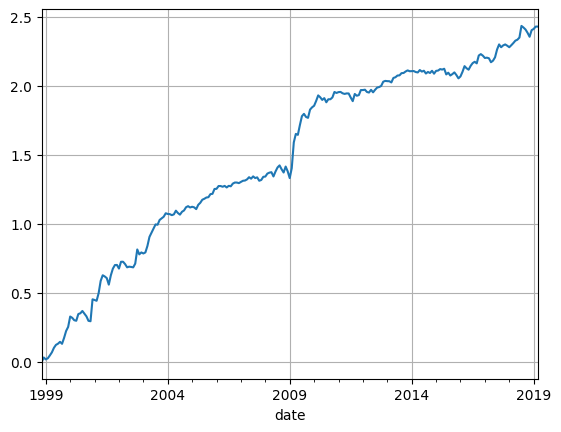

,years_pnl_cum,turnover,sharpe_coef,drawdown,drawdown_day_start,drawdown_day_end
date,,,,,,
1998,0.031845,0.070064,1.000000,0.000000,31.12.1998,30.11.1998
1999,0.221657,0.205098,3.248002,0.014297,31.12.1999,30.09.1999
2000,0.199974,0.175428,1.062588,0.074435,31.12.2000,30.11.2000
2001,0.248909,0.163102,1.800776,0.067899,31.12.2001,31.08.2001
2002,0.090614,0.160821,0.686148,0.040804,31.10.2002,31.08.2002
2003,0.283668,0.158596,3.946923,0.002384,31.12.2003,31.08.2003
2004,0.041803,0.161110,0.828594,0.028719,30.11.2004,31.07.2004
2005,0.134207,0.155053,2.694510,0.017166,31.12.2005,31.03.2005
2006,0.042240,0.155417,1.245366,0.011225,31.10.2006,30.06.2006


In [22]:
alpha_1 = -op.normalize(op.neutralize(data_Eps))
alpha_2 = -op.normalize(op.neutralize(data_Mkt_Cap_3M_Usd))
alpha_3 = -op.normalize(op.neutralize(data_Mom_11M_Usd))
alpha_4 = -op.normalize(op.neutralize(data_Pb))
alpha_5 = op.normalize(op.neutralize(data_Vol1Y_Usd))
alpha_6 = op.normalize(op.neutralize(data_Vol3Y_Usd))

uniform_portfolio = op.normalize(alpha_1 + alpha_2 + alpha_3 + alpha_4 + alpha_5 + alpha_6)
print('Проверяем, что распределение капитала по одному активу составляет не более 5%:', uniform_portfolio.max(axis=1).max(axis=0))

pnl_uniform_portfolio = mtr.alpha_stats(data_R1M_Usd.shift(1), uniform_portfolio, is_plot=True)
pnl_uniform_portfolio

In [23]:
print('mean sharpe:', pnl_uniform_portfolio.sharpe_coef.mean())
print('mean drawdown:', pnl_uniform_portfolio.drawdown.mean())
print('mean PnL:', pnl_uniform_portfolio.years_pnl_cum.mean())
print('mean turnover:', pnl_uniform_portfolio.turnover.mean())

mean sharpe: 1.3408795409696388
mean drawdown: 0.03405388881159594
mean PnL: 0.11039812862317272
mean turnover: 0.1533251071614013


Added ridge features

In [7]:
features_ridge = ['Mkt_Cap_12M_Usd', 'Mkt_Cap_6M_Usd', 'Return_On_Capital', 'Roc']
data = mldata.set_index(['date', 'stock_id']).unstack(level=0)[features_ridge]

for feature in features_ridge:
    data[feature].T.to_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/' + feature + '.csv')

In [8]:
Mkt_Cap_12M_Usd = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Mkt_Cap_12M_Usd.csv', index_col='date')
Mkt_Cap_12M_Usd.index = Mkt_Cap_12M_Usd.index.astype('datetime64[ns]')

Mkt_Cap_6M_Usd = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Mkt_Cap_6M_Usd.csv', index_col='date')
Mkt_Cap_6M_Usd.index = Mkt_Cap_6M_Usd.index.astype('datetime64[ns]')


Return_On_Capital = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Return_On_Capital.csv', index_col='date')
Return_On_Capital.index = Return_On_Capital.index.astype('datetime64[ns]')

Roc = pd.read_csv('/home/chingisbadmaev/Desktop/sirius_university/machine_learning/task_2_optimal_portfolio/features/Roc.csv', index_col='date')
Roc.index = Roc.index.astype('datetime64[ns]')


Проверяем, что распределение капитала по одному активу составляет не более 5%: 0.007723069358171747
pnl allTime: 2.3222433358824692


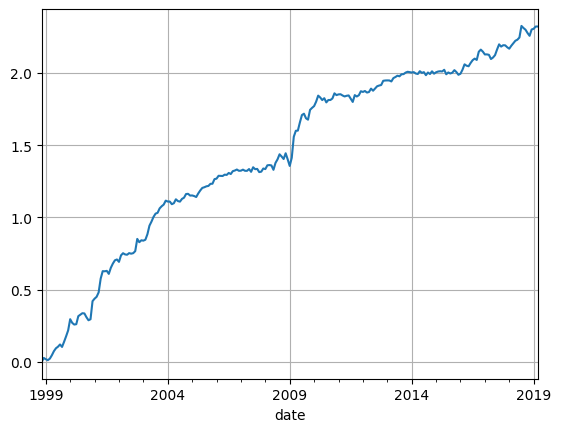

,years_pnl_cum,turnover,sharpe_coef,drawdown,drawdown_day_start,drawdown_day_end
date,,,,,,
1998,0.027495,0.049937,1.000000,0.000000,31.12.1998,30.11.1998
1999,0.190856,0.207022,2.893381,0.017090,31.12.1999,30.09.1999
2000,0.202401,0.123465,1.262098,0.048788,31.12.2000,31.10.2000
2001,0.288583,0.118966,2.790462,0.020845,31.12.2001,31.08.2001
2002,0.132830,0.116226,1.318264,0.022821,31.10.2002,30.11.2002
2003,0.274502,0.109420,4.676321,0.000000,31.12.2003,31.01.2003
2004,0.035050,0.107788,0.679407,0.018382,30.11.2004,31.03.2004
2005,0.114013,0.101559,2.705723,0.010887,31.12.2005,31.03.2005
2006,0.057562,0.101671,1.737412,0.008839,30.11.2006,31.12.2006


In [26]:
alpha_7 = -op.normalize(op.neutralize(Mkt_Cap_12M_Usd))
alpha_8 = -op.normalize(op.neutralize(Mkt_Cap_6M_Usd))
alpha_9 = -op.normalize(op.neutralize(Return_On_Capital))
alpha_10 = -op.normalize(op.neutralize(Roc))

uniform_portfolio_ridge = op.normalize(alpha_7 + alpha_8 + alpha_9 + alpha_10)
print('Проверяем, что распределение капитала по одному активу составляет не более 5%:', uniform_portfolio_ridge.max(axis=1).max(axis=0))

pnl_uniform_portfolio = mtr.alpha_stats(data_R1M_Usd.shift(1), op.normalize(uniform_portfolio + uniform_portfolio_ridge), is_plot=True)
pnl_uniform_portfolio

In [27]:
print('mean sharpe:', pnl_uniform_portfolio.sharpe_coef.mean())
print('mean drawdown:', pnl_uniform_portfolio.drawdown.mean())
print('mean PnL:', pnl_uniform_portfolio.years_pnl_cum.mean())
print('mean turnover:', pnl_uniform_portfolio.turnover.mean())

mean sharpe: 1.4548879805677992
mean drawdown: 0.02561362523787314
mean PnL: 0.10555651526738498
mean turnover: 0.10818216232791715
